In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Cleveland_heart_disease.csv")
df.head()

,Age,Sex,cp,trestbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.dtypes

Age         float64
Sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
rest_ecg    float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [4]:
df.shape

(303, 14)

In [5]:
# Checking for null values

df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
df["ca"]=df["ca"].replace(np.nan,df["ca"].mean())
df["thal"]=df["thal"].replace(np.nan,df["thal"].mean())
df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
# Correlation

df.corr()

,Age,Sex,cp,trestbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,num
Age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.222853
Sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.059186
rest_ecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.504092


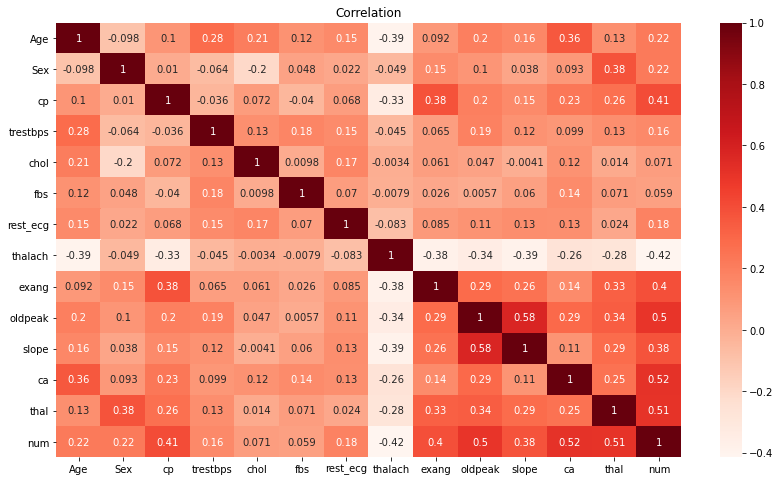

In [8]:
# Visualizing correlation

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

In [9]:
# dropping significantly negatively correlated column - thalach

df.drop("thalach",axis=1,inplace=True)
df.head()

,Age,Sex,cp,trestbps,chol,fbs,rest_ecg,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,0.0,1.4,1.0,0.0,3.0,0


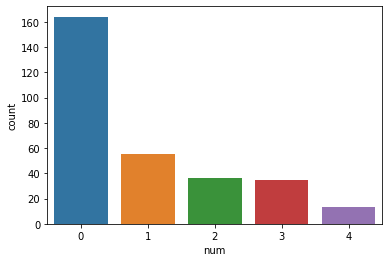

In [10]:
# Univariate analysis of target

sns.countplot(df['num'])
plt.show()

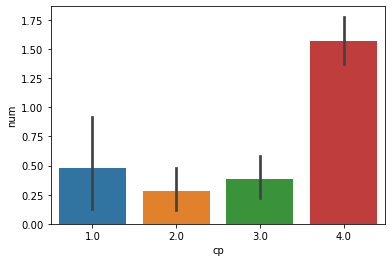

In [11]:
# Bivariate analysis

sns.barplot(df["cp"],df["num"])
plt.show()

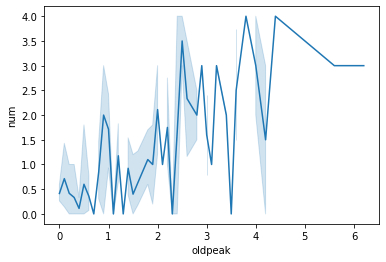

In [12]:
sns.lineplot(df["oldpeak"],df["num"])
plt.show()

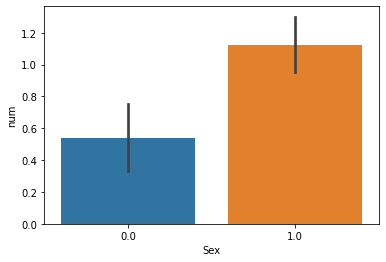

In [13]:
sns.barplot(df["Sex"],df["num"])
plt.show()

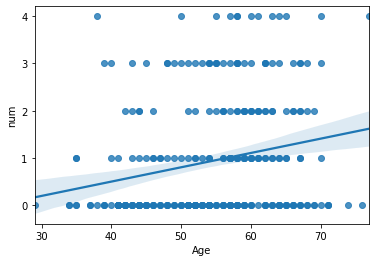

In [14]:
sns.regplot(df["Age"],df["num"])
plt.show()

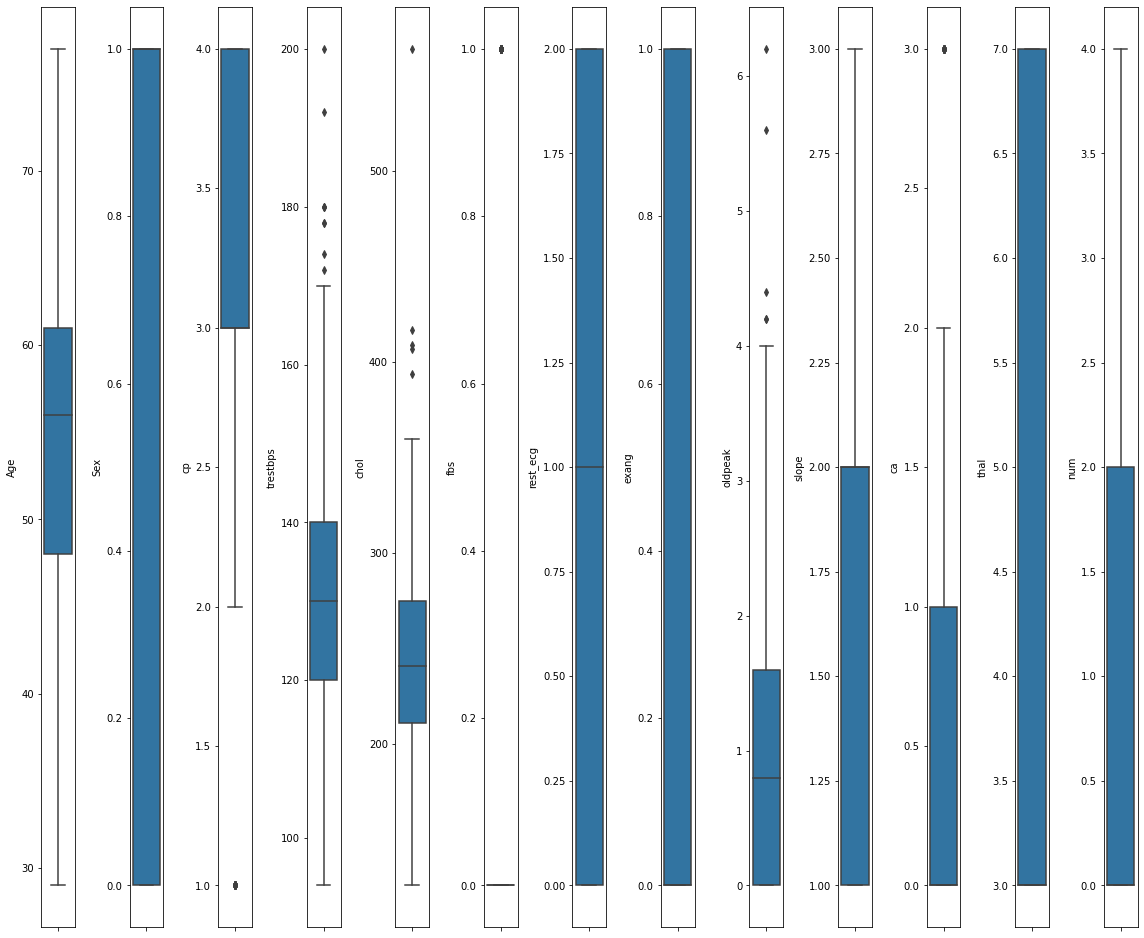

In [15]:
# Checking for outliers using boxplot

collist = df.columns.values
ncol = 13
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()

In [16]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Age,Sex,cp,trestbps,chol,fbs,rest_ecg,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,0.0,1.4,1.0,0.0,3.0,0


In [17]:
df.shape

(303, 13)

In [18]:
df_new.shape

(295, 13)

In [19]:
df = df_new

In [20]:
# Skewness

df.skew()

Age        -0.182996
Sex        -0.833604
cp         -0.829778
trestbps    0.530284
chol        0.262385
fbs         2.018036
rest_ecg    0.061353
exang       0.749018
oldpeak     1.014160
slope       0.499896
ca          1.238591
thal        0.293910
num         1.104319
dtype: float64

In [21]:
for i in df[['fbs','oldpeak','ca']]:
    df[i]=np.log(df[i]+1)

In [22]:
# Splitting independent variables and target

x = df.drop('num',axis=1)
print(x.head())
y = df[['num']]
print("\n")
print(y.head())

    Age  Sex   cp  trestbps   chol       fbs  rest_ecg  exang   oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  0.693147       2.0    0.0  1.193922   
1  67.0  1.0  4.0     160.0  286.0  0.000000       2.0    1.0  0.916291   
2  67.0  1.0  4.0     120.0  229.0  0.000000       2.0    1.0  1.280934   
3  37.0  1.0  3.0     130.0  250.0  0.000000       0.0    0.0  1.504077   
4  41.0  0.0  2.0     130.0  204.0  0.000000       2.0    0.0  0.875469   

   slope        ca  thal  
0    3.0  0.000000   6.0  
1    2.0  1.386294   3.0  
2    2.0  1.098612   7.0  
3    3.0  0.000000   3.0  
4    1.0  0.000000   3.0  


   num
0    0
1    2
2    1
3    0
4    0


In [23]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.959901,0.667891,-2.232284,0.826526,-0.242306,2.42084,1.038057,-0.694559,1.260672,2.341145,-0.777229,0.683689
1,1.400978,0.667891,0.883759,1.717699,0.918374,-0.41308,1.038057,1.439763,0.714955,0.684939,2.106361,-0.877642
2,1.400978,0.667891,0.883759,-0.658763,-0.329905,-0.41308,1.038057,1.439763,1.431703,0.684939,1.507962,1.204133
3,-1.907094,0.667891,-0.154922,-0.064648,0.129987,-0.41308,-0.976593,-0.694559,1.870317,2.341145,-0.777229,-0.877642
4,-1.466018,-1.497250,-1.193603,-0.064648,-0.877396,-0.41308,1.038057,-0.694559,0.634715,-0.971267,-0.777229,-0.877642


In [24]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = [GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.6101694915254238
accuracy score of GaussianNB() is
0.5932203389830508
[[34  1  4  0  0]
 [ 4  0  1  1  0]
 [ 0  1  0  4  0]
 [ 0  1  4  1  0]
 [ 0  1  0  2  0]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5
           3       0.12      0.17      0.14         6
           4       0.00      0.00      0.00         3

    accuracy                           0.59        59
   macro avg       0.20      0.21      0.21        59
weighted avg       0.60      0.59      0.60        59



0.7415254237288136
accuracy score of SVC() is
0.6610169491525424
[[37  1  1  0  0]
 [ 4  2  0  0  0]
 [ 1  4  0  0  0]
 [ 0  4  2  0  0]
 [ 1  2  0  0  0]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        39
           1       0.15      0.33      0.21         6
           2       0.00    

In [28]:
# Gridsearch cv on SVC

from sklearn.model_selection import GridSearchCV

svc = SVC()
p = {'kernel':['linear', 'poly', 'rbf'], 'gamma':['scale','auto'],'random_state':range(0,100)}
a = GridSearchCV(svc,p)
a.fit(x,y)
a.best_params_

{'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}

In [29]:
# SVC after hyperparameter tuning

svc = SVC(random_state=0) #gamma=scale and kernel = rbf are default
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
pred=svc.predict(x_test)
print("Accuracy score of", svc ,"is")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
# Svc after hyperparameter tuning has higher accuracy score than gaussianNB, so we continue with this model

0.7415254237288136
Accuracy score of SVC(random_state=0) is
0.6610169491525424
[[37  1  1  0  0]
 [ 4  2  0  0  0]
 [ 1  4  0  0  0]
 [ 0  4  2  0  0]
 [ 1  2  0  0  0]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        39
           1       0.15      0.33      0.21         6
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3

    accuracy                           0.66        59
   macro avg       0.20      0.26      0.22        59
weighted avg       0.58      0.66      0.62        59



In [30]:
# cross_val_score

from sklearn.model_selection import cross_val_score

print("Cross_val_score for",svc ,'is ',cross_val_score(svc,x,y,cv=15).mean())

Cross_val_score for SVC(random_state=0) is  0.5928070175438598


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
pred=rf.predict(x_test)
print("Accuracy score of", rf ,"is")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
Accuracy score of RandomForestClassifier() is
0.6271186440677966
[[34  2  3  0  0]
 [ 4  1  0  1  0]
 [ 0  4  1  0  0]
 [ 1  1  2  1  1]
 [ 0  3  0  0  0]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        39
           1       0.09      0.17      0.12         6
           2       0.17      0.20      0.18         5
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         3

    accuracy                           0.63        59
   macro avg       0.33      0.28      0.28        59
weighted avg       0.65      0.63      0.63        59



In [32]:
# Saving the model

import joblib
joblib.dump(svc,'svc_cleveland_heart_disease.pkl')

['svc_cleveland_heart_disease.pkl']